# Effects of Loan Characteristics on Borrower's APR

## by Sayed Mohamed

## Investigation Overview

In this investigation, we will explore the characteristics of loans that could be used to predict their  APR. The main focus was on the original loan amount as it one of the main features, borrower's Prosper rating, loan term, borrower's stated monthly income.  



## Dataset

The dataset consists of borrower APRs and attributes of about 114K loans. The attributes includs original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. some data points were removed from the analysis due to very large stated monthly income I;ve considered them as outliers and missing borrower APR information.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import seaborn as sb
%matplotlib inline


In [7]:
df = pd.read_csv('prosperLoanData.csv')
colus = ['BorrowerState','LoanOriginalAmount', 'EmploymentStatus','BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)']
sub_df = df[colus]
sub_df = sub_df[~sub_df.BorrowerAPR.isna()]
sub_df = sub_df[~sub_df.BorrowerState.isna()]
sub_df=sub_df.dropna(subset=['ProsperRating (Alpha)'])
sub_df = sub_df[sub_df.StatedMonthlyIncome<=25000]

sub_df.shape

(84439, 7)

## Distribution of Borrower APR

it is multimodal. there is a peak (small one )at 0.1 , large at the center of the distribution , small peak about 0.3 , large at 0.36 A small peak centered at 0.38 

there are Only very few loans have APR greater than 0.43.  

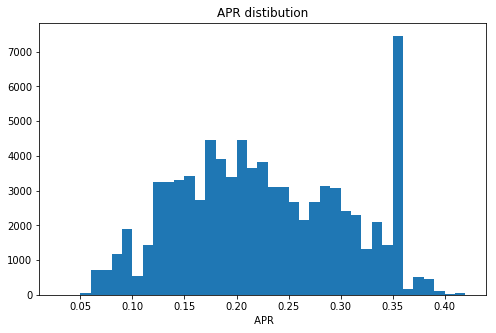

In [8]:
bins = np.arange(0.03, 0.42395, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(sub_df.BorrowerAPR, bins = bins);
plt.xlabel(' APR');
plt.title('APR distibution');


## states of the loans 

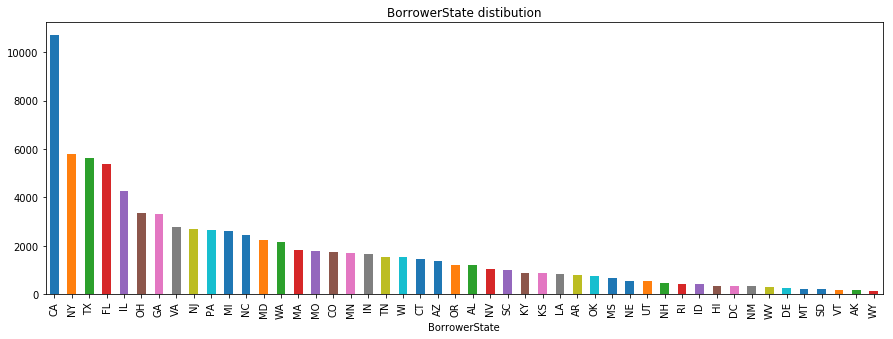

In [9]:
# BorrowerState exploration 
plt.figure(figsize=[15,5 ])
sub_df['BorrowerState'].value_counts().plot(kind='bar')
plt.xlabel('BorrowerState');
plt.title('BorrowerState distibution');


## exploration of four features relaions and the distribution

show us the relationships between them 

term = 36 -->  is the most common term 

CA has a lot of clients about (12.7%) of the loans belong to borrowers from California 

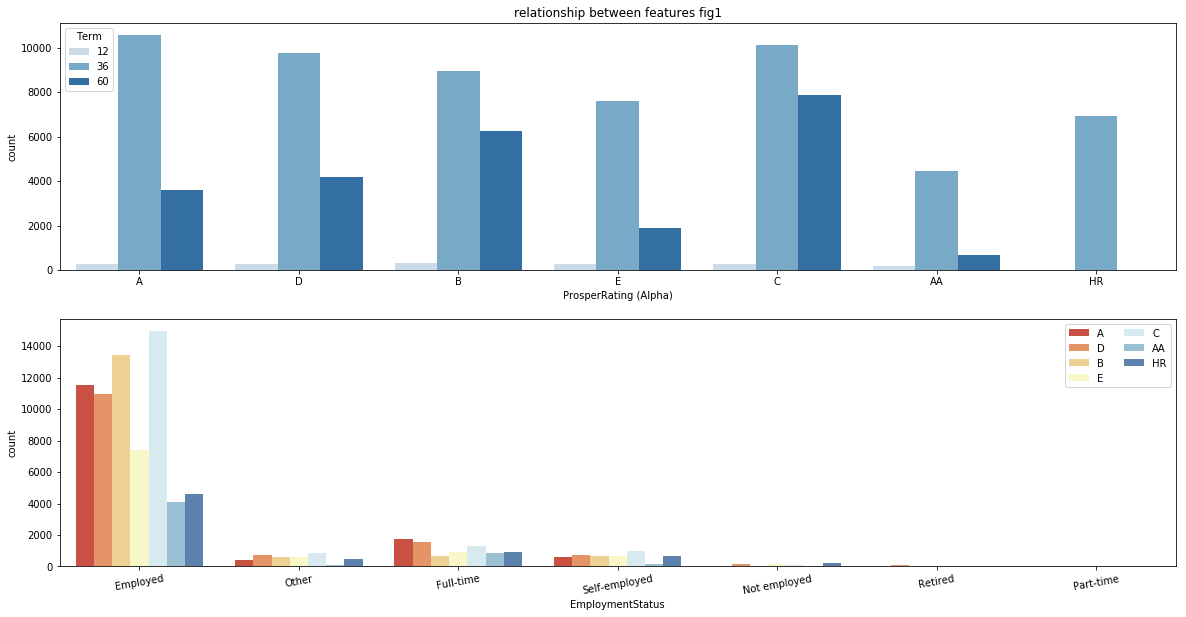

In [20]:
plt.figure(figsize = [20, 10])

# Prospe_rating vs term
plt.subplot(2, 1, 1)
sb.countplot(data = sub_df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

plt.title('relationship between features fig1');


# Prosper-rating vs employment_status
ax = plt.subplot(2, 1, 2)
sb.countplot(data = sub_df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'RdYlBu')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);




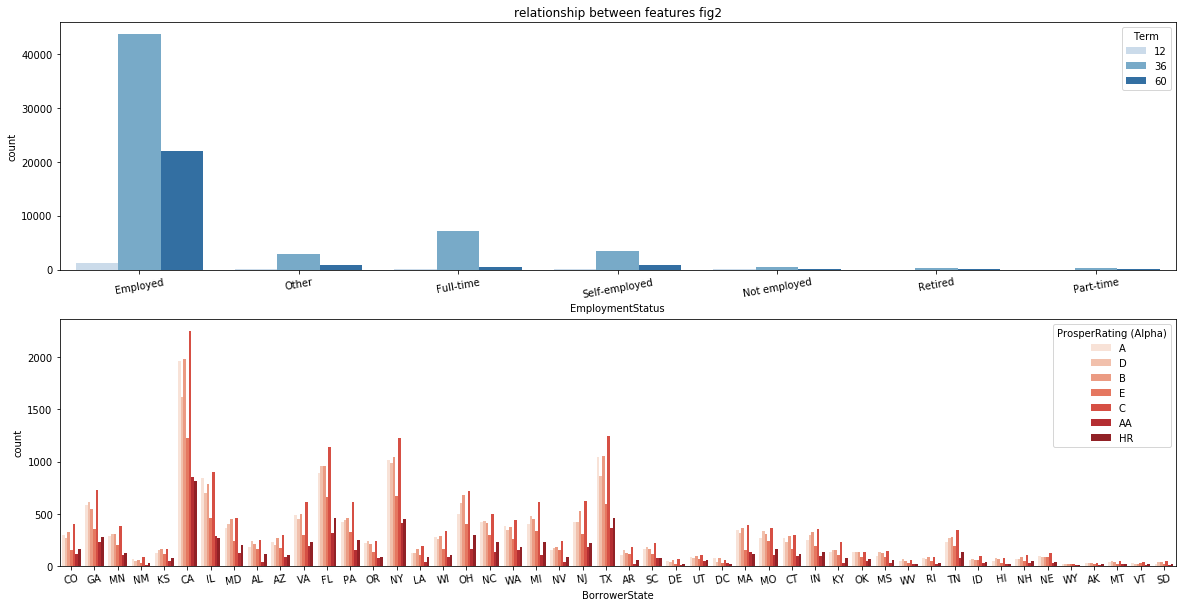

In [19]:
plt.figure(figsize = [20, 10])
# employment_status vs term
ax = plt.subplot(2, 1, 1)
sb.countplot(data = sub_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)
plt.title('relationship between features fig2');

plt.subplot(2, 1, 2)
sb.countplot(data = sub_df, x = 'BorrowerState', hue = 'ProsperRating (Alpha)', palette = 'Reds')
plt.xticks(rotation=10);


## Original Loan Amount

the most common values are at 10K ,15K,20k ,25K 

people like to have a number multiples of 5K :XD


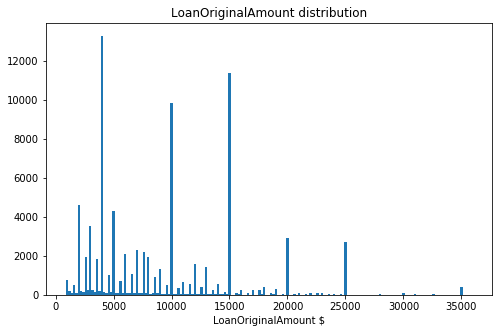

In [21]:
bins = np.arange(900, 36000, 200)
plt.figure(figsize=[8, 5])
plt.hist(sub_df['LoanOriginalAmount'], bins = bins);
plt.xlabel('LoanOriginalAmount $');
plt.title('LoanOriginalAmount distribution');


## EmploymentStatus

the most of the clients are employed 

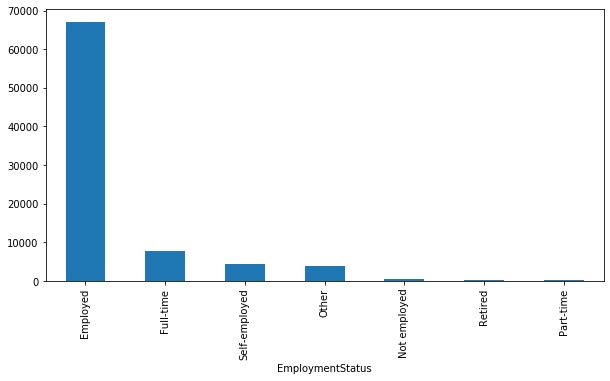

In [14]:
plt.figure(figsize=[10,5 ])
sub_df['EmploymentStatus'].value_counts().plot(kind='bar')
plt.xlabel('EmploymentStatus');
plt.title('EmploymentStatus distribution');


## Borrower APR vs. Loan Amount

the borrower APR is negatively correlated with loan amount. 

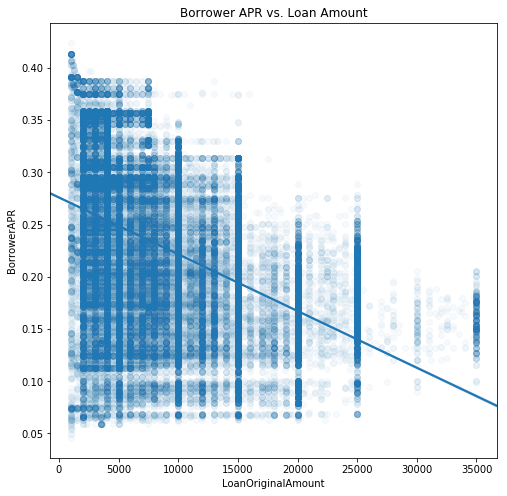

In [22]:
plt.figure(figsize = [8, 8])
sb.regplot( x = sub_df['LoanOriginalAmount'], y = sub_df['BorrowerAPR'], scatter_kws={'alpha':0.03});
plt.title('Borrower APR vs. Loan Amount');


## Borrower APR vs. Prosper Rating

Interestingly, the APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term. which make sense 

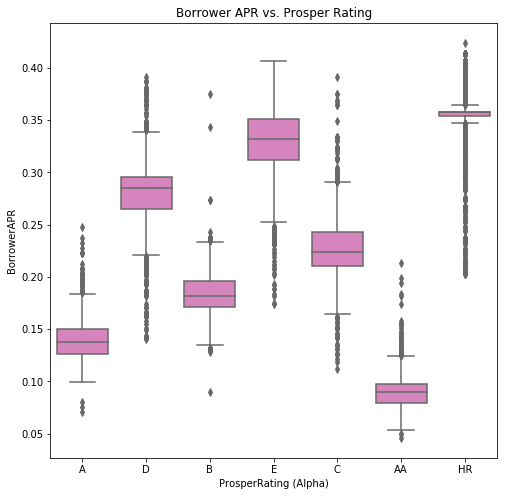

In [23]:
plt.figure(figsize=[8,8])
sb.boxplot(x=sub_df['ProsperRating (Alpha)'], y=sub_df['BorrowerAPR'], color=sb.color_palette()[6]);
plt.title('Borrower APR vs. Prosper Rating');


## Prosper Rating Effect on Relationship between APR and Loan Amount

The loan amount possitively increases with better rating. The APR decreases with better rating. 

so, the relationship between  APR and loan amount turns from negative to slightly positive when the * Prosper_ratings * are _increased_ from HR to A or better. 

it's a defence mechanism,as people with A or AA ratings borrow more money, increasing APR could prevent them borrow even more and maximize the profit. on the other hand people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

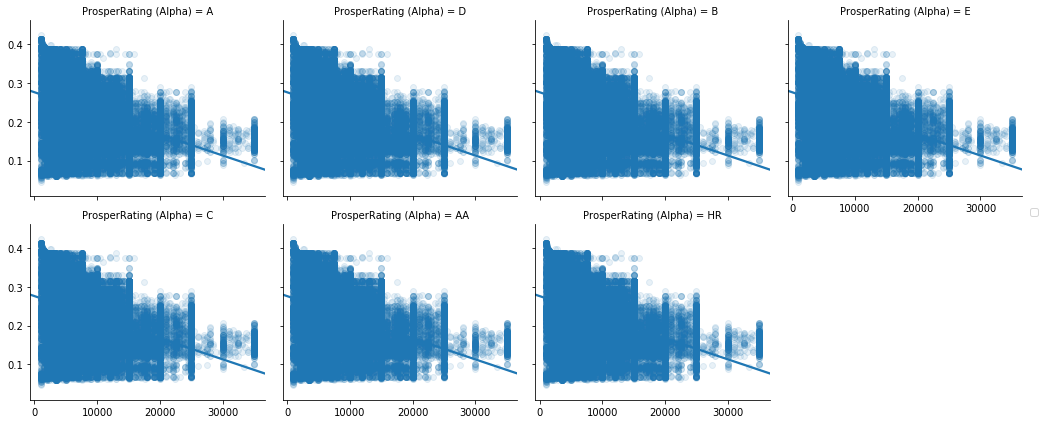

In [30]:

ni=sb.FacetGrid(data=sub_df, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
ni.map(sb.regplot, x = sub_df['LoanOriginalAmount'], y = sub_df['BorrowerAPR'], x_jitter=0.04, scatter_kws={'alpha':0.1}).add_legend();


## Borrower APR by Rating and Term

Interestingly, the APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term. which make sense 

>the rating and term_effects on stated_monthly_income and loan_original_amount variables

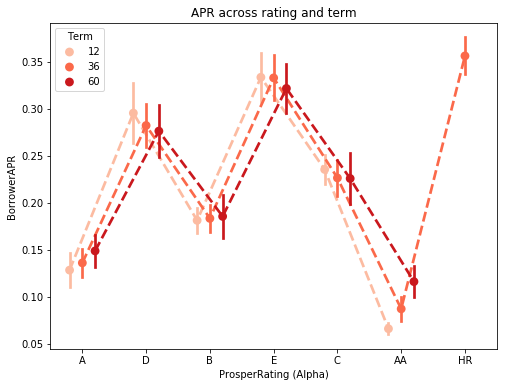

In [26]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(x=sub_df['ProsperRating (Alpha)'], y =sub_df['BorrowerAPR'], hue =sub_df['Term'],palette = 'Reds', linestyles = '--', dodge = 0.4, ci='sd');
plt.title('APR across rating and term');



## THANKS

In [27]:
!jupyter nbconvert slide_deck.ipynb --to slides --template output_toggle.tpl 

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 900894 bytes to slide_deck.slides.html
